Columns in df after loading: ['title', 'price', 'link']
Minimum price: $0.06
Maximum price: $999.99
Average price: $29.28

Top 5 most expensive cars:
                                                                           title            price
     All Cars & others | Jailbreak | Roblox | Clean Cars | Cheap & Fast Delivery $1.49 to $999.99
    All clean items for jailbreak | Roblox | Jailbreak | Cheap and Fast Delivery $1.49 to $999.00
All Cars Spoilers Rims Colors | Jailbreak | Roblox | Fast Delivery | Clean Items $0.99 to $550.00
 Alternator For Hyundai Car Accent L4 1.6L 12-14 Veloster L4 1.6L 12 Veloster L4          $450.00
Home Car Trip Using For Oxygen Concentrator 3L With Rechargeable Battery 2500mAh          $228.32


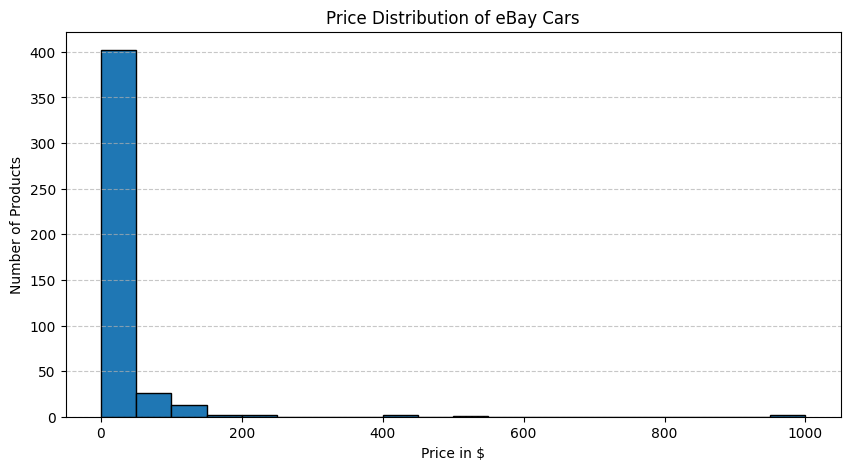

count    450.000000
mean      29.284156
std       81.126526
min        0.060000
25%        5.040000
50%       10.750000
75%       24.990000
max      999.990000
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("ebay_cars.csv", encoding="utf-8")
print("Columns in df after loading:", df.columns.tolist())

# Function to clean price values
def clean_price(price):
    price = str(price).replace("$", "").replace(",", "").strip()
    if "to" in price:
        try:
            low, high = map(float, price.split("to"))
            return pd.Series([low, high])
        except ValueError:
            return None
    else:
        try:
            value = float(price)
            return pd.Series([value, value])
        except ValueError:
            return None

# Apply cleaning function
df[['price_min', 'price_max']] = df['price'].apply(clean_price)

# Drop NaN values in the 'price' column
df = df.dropna(subset=["price_min", "price_max"]).reset_index(drop=True)

# Remove extreme outliers (e.g., prices > 100,000)
df = df[df["price_max"] < 100000]


# Analysus
min_price = df["price_min"].min()
max_price = df["price_max"].max()
combined_prices = pd.concat([df["price_min"], df["price_max"]])
avg_price = combined_prices.mean()
top_expensive = df.sort_values("price_max", ascending=False).head(5)


print(f"Minimum price: ${min_price:.2f}")

print(f"Maximum price: ${max_price:.2f}")

print(f"Average price: ${avg_price:.2f}")

print("\nTop 5 most expensive cars:")
print(top_expensive[['title', 'price']].to_string(index=False))

# Plot distribution of prices

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(combined_prices, bins=20, edgecolor="black")
plt.xlabel("Price in $")
plt.ylabel("Number of Products")
plt.title("Price Distribution of eBay Cars")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display summary statistics
print(combined_prices.describe())
